In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

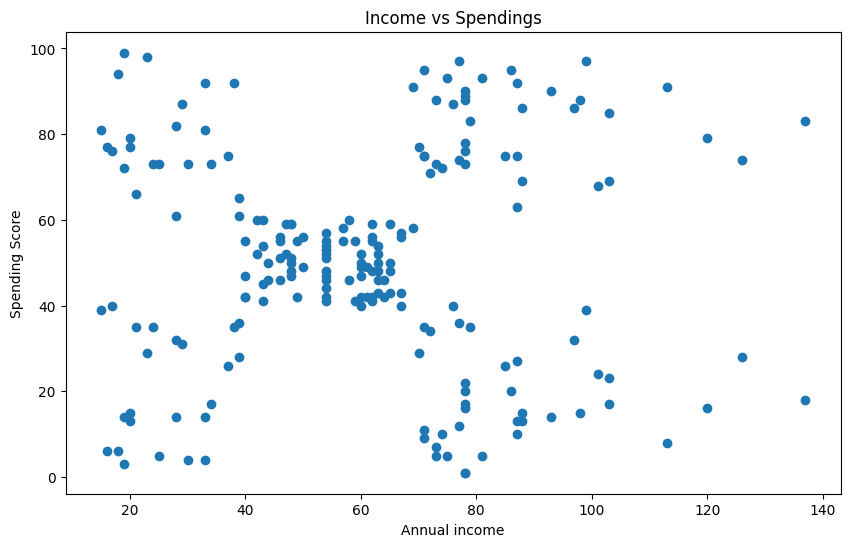

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])
plt.xlabel("Annual income")
plt.ylabel("Spending Score")
plt.title("Income vs Spendings")
plt.show()

In [10]:
X=df.iloc[:,[3,4]].values
X.shape

(200, 2)

In [11]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [13]:
#elbow method

clustering_score=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="random",random_state=42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_)

D:\Users\ROHIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


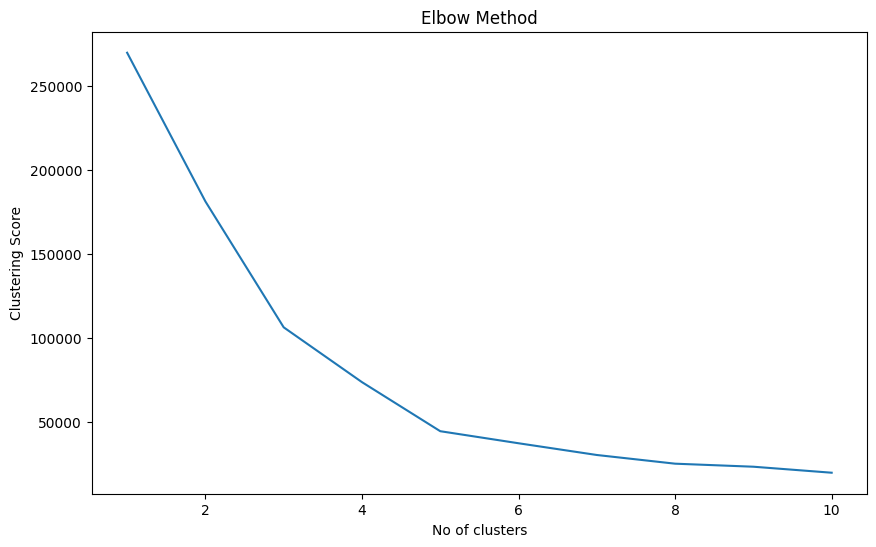

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),clustering_score)
plt.xlabel("No of clusters")
plt.ylabel("Clustering Score")
plt.title("Elbow Method")
plt.show()

In [19]:
clustering_score

[269981.28,
 181363.595959596,
 106348.3730621112,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30273.39431207004,
 25095.703209997544,
 23287.318947718944,
 19710.0302716608]

In [20]:
clustering_score[4]

44448.45544793371

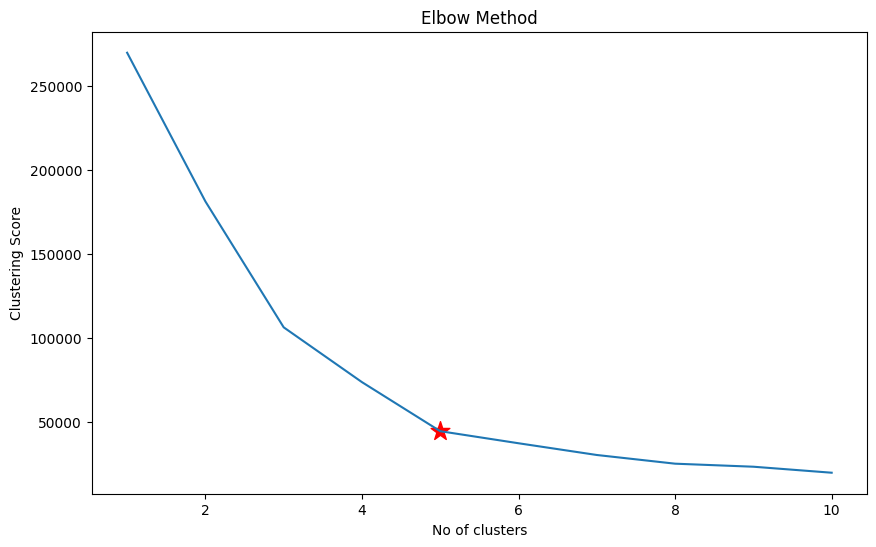

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),clustering_score)
plt.scatter(5,clustering_score[4],s=200,c="red",marker="*")
plt.xlabel("No of clusters")
plt.ylabel("Clustering Score")
plt.title("Elbow Method")
plt.show()

In [25]:
# Silhoutte score:used to determine degree of separation between clusters

# coeff range is in [-1,1]

#If it is 0 : Sample is very much closer to neighbouring cluster
#If it is 1 : Sample is away from neighbouring cluster
#If it is -1: Sample is assigned to wrong cluster

In [23]:
from sklearn.metrics import silhouette_score

silhouette_score_lst=[]

for i in range(2,11):
    silhouette_score_lst.append(silhouette_score(X,(KMeans(n_clusters=i).fit_predict(X))))

In [24]:
silhouette_score_lst

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.53976103063432,
 0.5288104473798049,
 0.45827056882053113,
 0.4569479922714121,
 0.4509237544334418]

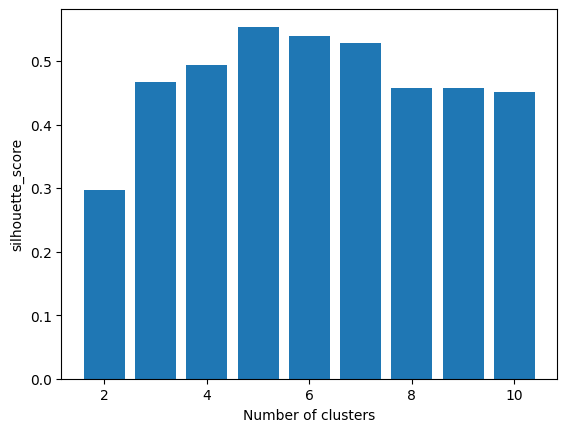

In [27]:
#plotting

k=[2,3,4,5,6,7,8,9,10]
plt.bar(k,silhouette_score_lst)
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_score")
plt.show()

In [28]:
# highest value of bar from given clusters values will be selected

In [ ]:
#selecting number of clusters =5

In [29]:
#set up a model
kmeans=KMeans(n_clusters=5,random_state=42)

#fit model
kmeans.fit(X)

#predict
pred=kmeans.predict(X)
print(pred)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [30]:
df["cluster"]=pd.DataFrame(pred,columns=["cluster"])
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
5,6,Female,22,17,76,3
6,7,Female,35,18,6,2
7,8,Female,23,18,94,3
8,9,Male,64,19,3,2
9,10,Female,30,19,72,3


In [31]:
df["cluster"].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster, dtype: int64

In [32]:
#centroids of each clusters

kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [33]:
kmeans.cluster_centers_[:,0]

array([55.2962963 , 88.2       , 26.30434783, 25.72727273, 86.53846154])

In [34]:
X[pred==0,0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)

In [35]:
X[pred==0,1]

array([61, 55, 47, 42, 42, 52, 60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55,
       52, 59, 51, 59, 50, 48, 59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52,
       42, 51, 55, 41, 44, 57, 46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52,
       47, 50, 42, 49, 41, 48, 59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42,
       46, 48, 50, 43, 59, 43, 57, 56, 40, 58, 35, 34, 40], dtype=int64)

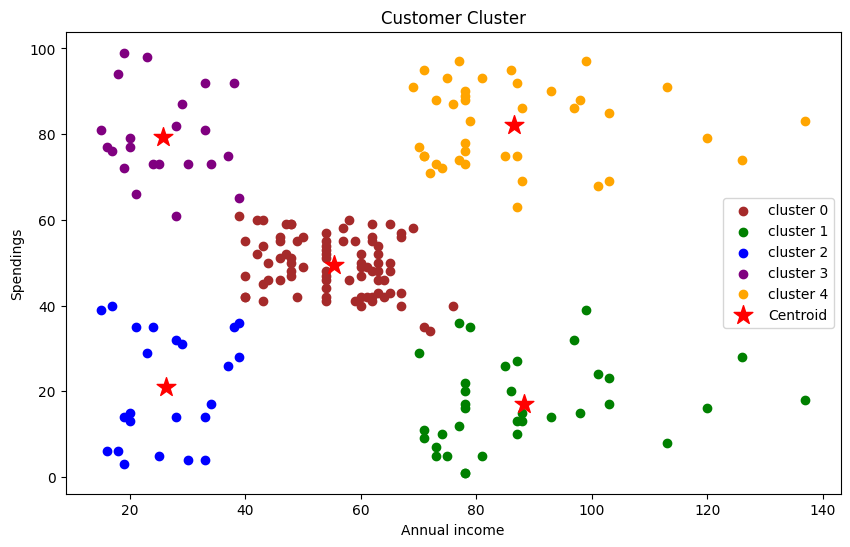

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred==0,0],X[pred==0,1],c="brown",label="cluster 0")
plt.scatter(X[pred==1,0],X[pred==1,1],c="green",label="cluster 1")
plt.scatter(X[pred==2,0],X[pred==2,1],c="blue",label="cluster 2")
plt.scatter(X[pred==3,0],X[pred==3,1],c="purple",label="cluster 3")
plt.scatter(X[pred==4,0],X[pred==4,1],c="orange",label="cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c="red",label="Centroid",marker="*")
plt.title("Customer Cluster")
plt.xlabel("Annual income")
plt.ylabel("Spendings")
plt.legend()
plt.show()